<a href="https://colab.research.google.com/github/EronDS/Neural-Networks/blob/main/Autoencoder/Denoising/AutoencoderDENOISINGmnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.models import Sequential,Model 
from keras.layers import Dense,Conv2D,Conv2DTranspose,Activation,LeakyReLU, Reshape, Input, Flatten
from tensorflow.keras.utils import plot_model
import numpy as np 
from keras.optimizers import Adam,RMSprop
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [2]:
(x_train, y_train) , (x_test, y_test) = mnist.load_data()
(real_imgs_train , __) , (real_imgs_test , __) = mnist.load_data()

In [3]:
num_categories = 10 


x_train = x_train.astype('float32') / 255 
x_test = x_test.astype('float32') / 255 


x_train = np.reshape(x_train , [-1, 28 , 28 , 1])
x_test = np.reshape(x_test , [-1 , 28 , 28 , 1])


batch_size = 64 



In [4]:
inputs = Input(shape = (28 , 28 , 1) , name = 'encoder_input')
inputs_ = Flatten()(inputs)

enc_1 = Dense(128 , activation = 'relu')(inputs_)
enc_2 = Dense(64 , activation = 'relu')(enc_1)

latent = Dense(32, activation = 'relu' , name = 'latent_vector')(enc_2)


dec_1 = Dense(64 , activation = 'relu' , name = 'decoder_input')(latent)
dec_2 = Dense(128 , activation = 'relu')(dec_1)
dec = Dense(np.prod((28,28,1)) , activation = 'sigmoid' , name = 'decoder_output')(dec_2)

decoded = Reshape((28,28,1))(dec)

autoencoder = Model(inputs,decoded , name = 'autoencoder')
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
latent_vector (Dense)        (None, 32)                2080      
_________________________________________________________________
decoder_input (Dense)        (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               

In [5]:
def GaussianNoise(img):


  noise = np.random.uniform(.2,.6)
  Gnoise = np.random.normal(scale = .2 , size = img.shape)
  img_noised = img + Gnoise 


  img_noised = np.clip(img_noised , 0. , 1.)

  return img_noised

In [6]:
datagen = ImageDataGenerator(preprocessing_function= GaussianNoise)

train_data = datagen.flow(x_train,x_train,batch_size= batch_size, shuffle  = False)

In [7]:
x_val = GaussianNoise(x_test)


val_datagen = ImageDataGenerator()
val_data = val_datagen.flow(x_val,x_test,batch_size= batch_size,shuffle = False)

In [8]:
autoencoder.compile('adam' , loss = 'binary_crossentropy' , metrics = 'mse')

In [9]:
train_steps = train_data.n // train_data.batch_size 
val_steps = val_data.n // train_data.batch_size



autoencoder.fit_generator(train_data,steps_per_epoch=train_steps,
                          epochs = 50, validation_data = val_data,
                          validation_steps = val_steps)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
937/937 [==============================] - 20s 9ms/step - loss: 0.2499 - mse: 0.0628 - val_loss: 0.1405 - val_mse: 0.0259
Epoch 2/50
937/937 [==============================] - 8s 9ms/step - loss: 0.1364 - mse: 0.0244 - val_loss: 0.1230 - val_mse: 0.0201
Epoch 3/50
937/937 [==============================] - 8s 9ms/step - loss: 0.1223 - mse: 0.0197 - val_loss: 0.1147 - val_mse: 0.0173
Epoch 4/50
937/937 [==============================] - 8s 8ms/step - loss: 0.1134 - mse: 0.0168 - val_loss: 0.1090 - val_mse: 0.0154
Epoch 5/50
937/937 [==============================] - 8s 8ms/step - loss: 0.1091 - mse: 0.0154 - val_loss: 0.1065 - val_mse: 0.0146
Epoch 6/50
937/937 [==============================] - 8s 9ms/step - loss: 0.1066 - mse: 0.0145 - val_loss: 0.1034 - val_mse: 0.0136
Epoch 7/50
937/937 [==============================] - 8s 9ms/step - loss: 0.1039 - mse: 0.0137 - val_loss: 0.1017 - val_mse: 0.0131
Epoch 8/50
937/937 [==============================] - 8s 9ms/step - loss: 0

Train Data

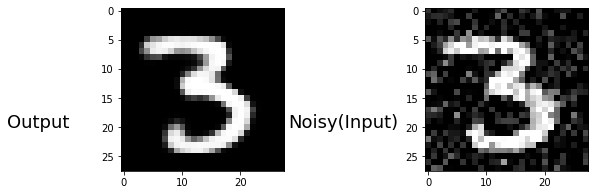

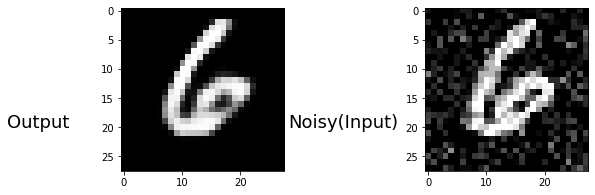

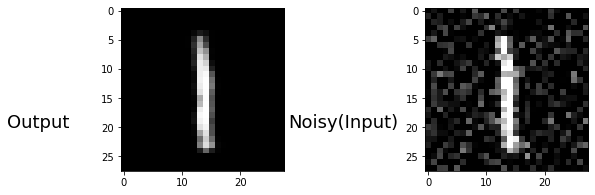

<Figure size 720x216 with 0 Axes>

In [10]:
u = 1
x = 2
for i in range(12,17):
  plt.figure(figsize = (10,3))
  if u >= 7:
    break
  plt.subplot(1,2,1)
  plt.text(-20 , 20 , 'Output', fontsize = 18)
  u+= 2
  plt.imshow(np.clip(autoencoder.predict(x_train[i].reshape(1,28 , 28,1)),0.0,1.0).reshape(28, 28,1)[:,:,0], cmap = 'gray')
  x+=2
  plt.subplot(1,2 ,2 )
  plt.text(-24 , 20 , 'Noisy(Input)', fontsize = 18)
  plt.imshow(train_data[0][0][i].reshape(28,28) , cmap = 'gray')


Test (Validation) Data

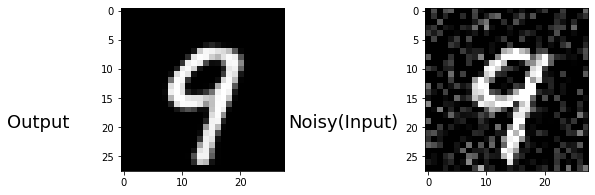

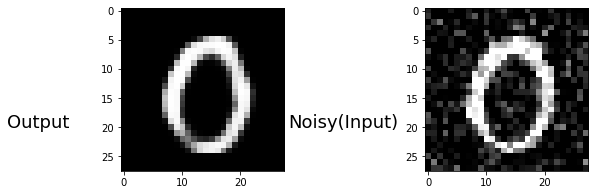

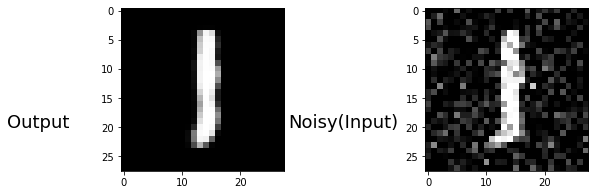

<Figure size 720x216 with 0 Axes>

In [11]:
u = 1
x = 2
for i in range(12,17):
  plt.figure(figsize = (10,3))
  if u >= 7:
    break
  plt.subplot(1,2,1)
  plt.text(-20 , 20 , 'Output', fontsize = 18)
  u+= 2
  plt.imshow(np.clip(autoencoder.predict(x_test[i].reshape(1,28 , 28,1)),0.0,1.0).reshape(28, 28,1)[:,:,0], cmap = 'gray')
  x+=2
  plt.subplot(1,2 ,2 )
  plt.text(-24 , 20 , 'Noisy(Input)', fontsize = 18)
  plt.imshow(val_data[0][0][i].reshape(28,28) , cmap = 'gray')
